In [1]:
import xarray as xr
import sklearn

import numpy as np
import pandas as pd
from pathlib import Path

import os, sys
import glob

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
#import seaborn as sns
#sns.set_style('ticks')

from scipy import stats
from scipy.signal import detrend
from scipy.stats import percentileofscore

from datetime import datetime, timedelta



Compare wind time and sea level pressure time series at the 2 locations for point reyes and monterey
Start with Monterey and compare with Sam's data

In [2]:
era5m=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/era5/monterey/era5_36.5_122.0_wind.csv",parse_dates=["valid_time"])
era5mw=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/era5/monterey/era5_36.5_122.25_wind.csv",parse_dates=["valid_time"])
era5m.index=era5m.valid_time
era5mw.index=era5mw.valid_time
era5mw

,valid_time,u10,v10,d2m,t2m,msl,sst,sp,tp,latitude,longitude
valid_time,,,,,,,,,,,
1970-01-01 00:00:00,1970-01-01 00:00:00,2.009552,-4.129425,280.33228,285.25165,102344.560,285.95312,102525.340,0.0,36.5,-122.25
1970-01-01 01:00:00,1970-01-01 01:00:00,2.106308,-4.668304,280.82593,285.47595,102373.125,285.95312,102553.234,0.0,36.5,-122.25
1970-01-01 02:00:00,1970-01-01 02:00:00,2.162170,-4.688843,281.16810,285.56647,102341.810,285.95312,102522.445,0.0,36.5,-122.25
1970-01-01 03:00:00,1970-01-01 03:00:00,2.206924,-5.048065,281.22525,285.54860,102352.060,285.95312,102531.720,0.0,36.5,-122.25
1970-01-01 04:00:00,1970-01-01 04:00:00,1.855011,-5.708862,281.23035,285.44592,102336.440,285.95312,102516.000,0.0,36.5,-122.25
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-01 19:00:00,2025-01-01 19:00:00,0.479965,-4.150879,281.19574,285.19940,102319.625,286.21436,102499.420,0.0,36.5,-122.25
2025-01-01 20:00:00,2025-01-01 20:00:00,1.734680,-5.591476,281.51752,285.17432,102268.560,286.21436,102449.164,0.0,36.5,-122.25
2025-01-01 21:00:00,2025-01-01 21:00:00,1.906784,-6.122818,281.21332,285.43518,102206.625,286.21436,102387.260,0.0,36.5,-122.25


In [3]:
era5m.valid_time[0]

/tmp/ipykernel_4044392/1320964046.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  era5m.valid_time[0]


Timestamp('1970-01-01 00:00:00')

In [4]:
#detrend u10, v10, msl, sst, sp
era5m['u10_d']=detrend(era5m['u10'],type='linear')
era5m['v10_d']=detrend(era5m['v10'],type='linear')
era5m['msl_d']=detrend(era5m['msl'],type='linear')
era5m['sst_d']=detrend(era5m['sst'],type='linear')
era5m['sp_d']=detrend(era5m['sp'],type='linear')

era5mw['u10_d']=detrend(era5mw['u10'],type='linear')
era5mw['v10_d']=detrend(era5mw['v10'],type='linear')
era5mw['msl_d']=detrend(era5mw['msl'],type='linear')
era5mw['sst_d']=detrend(era5mw['sst'],type='linear')
era5mw['sp_d']=detrend(era5mw['sp'],type='linear')

In [5]:
print(era5m['u10_d'].mean())
print(era5m['v10_d'].mean())
print(era5m['msl_d'].mean())
print(era5m['sst_d'].mean())
print(era5m['sp_d'].mean())

print(era5mw['u10_d'].mean())
print(era5mw['v10_d'].mean())
print(era5mw['msl_d'].mean())
print(era5mw['sst_d'].mean())
print(era5mw['sp_d'].mean())

-3.583955395239264e-16
1.047835380029164e-15
-9.981957115127868e-12
-1.3848120703357526e-13
-1.682995272927346e-11
-3.159539624750404e-17
-1.2025113497184373e-16
-7.644958643609559e-11
-3.877038063415738e-14
-5.492158880034192e-12


In [6]:
#Subtract the mean
era5m['u10_a']=era5m['u10_d']-era5m['u10_d'].mean()
era5m['v10_a']=era5m['v10_d']-era5m['v10_d'].mean()
era5m['msl_a']=era5m['msl_d']-era5m['msl_d'].mean()
era5m['sst_a']=era5m['sst_d']-era5m['sst_d'].mean()
era5m['sp_a']=era5m['sp_d']-era5m['sp_d'].mean()

era5mw['u10_a']=era5mw['u10_d']-era5mw['u10_d'].mean()
era5mw['v10_a']=era5mw['v10_d']-era5mw['v10_d'].mean()
era5mw['msl_a']=era5mw['msl_d']-era5mw['msl_d'].mean()
era5mw['sst_a']=era5mw['sst_d']-era5mw['sst_d'].mean()
era5mw['sp_a']=era5mw['sp_d']-era5mw['sp_d'].mean()

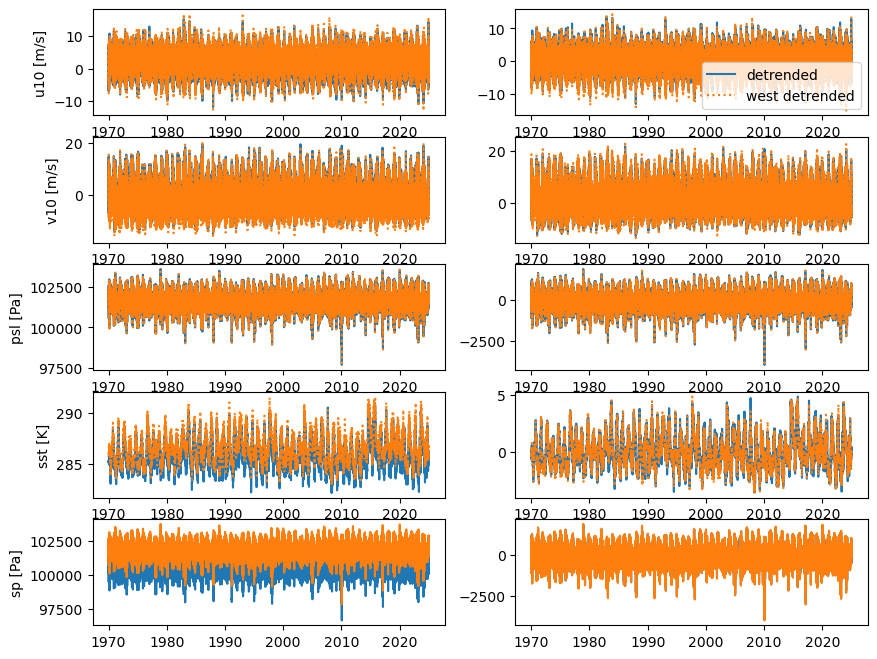

In [7]:
fig, ax = plt.subplots(5,2,figsize=(10,8))
ax[0,0].plot(era5m.u10, label='u10')
ax[0,1].plot(era5m.u10_a, label='detrended')
ax[0,0].plot(era5mw.u10, label='u10 west',linestyle=":")
ax[0,1].plot(era5mw.u10_a, label='west detrended',linestyle=":")

ax[0,0].set_ylabel('u10 [m/s]')

ax[1,0].plot(era5m.v10, label='v10')
ax[1,1].plot(era5m.v10_a, label='detrended')
ax[1,0].plot(era5mw.v10, label='v10 west',linestyle=":")
ax[1,1].plot(era5mw.v10_a, label='west detrended',linestyle=":")

ax[1,0].set_ylabel('v10 [m/s]')

ax[2,0].plot(era5m.msl, label='psl')
ax[2,1].plot(era5m.msl_a, label='detrended')
ax[2,0].plot(era5mw.msl, label='psl west',linestyle=":")
ax[2,1].plot(era5mw.msl_a, label='west detrended',linestyle=":")

ax[2,0].set_ylabel('psl [Pa]')

ax[3,0].plot(era5m.sst, label='sst')
ax[3,1].plot(era5m.sst_a, label='detrended')
ax[3,0].plot(era5mw.sst, label='sst west',linestyle=":")
ax[3,1].plot(era5mw.sst_a, label='west detrended',linestyle=":")

ax[3,0].set_ylabel('sst [K]')

ax[4,0].plot(era5m.sp, label='sp')
ax[4,1].plot(era5m.sp_a, label='detrended')
ax[4,0].plot(era5mw.sp, label='sp west')
ax[4,1].plot(era5mw.sp_a, label='west detrended')

ax[4,0].set_ylabel('sp [Pa]')

ax[0,1].legend()
# ax[1].legend()
# ax[2].legend()
# ax[3].legend()
# ax[4].legend()

In [8]:
# #calculate windstress using Sam's method u_windstress = u * sqrt((u*u + v*v))
# era5m['u10_str']=era5m['u10_a']*np.sqrt((era5m['u10_a']*era5m['u10_a'])+(era5m['v10_a']*era5m['v10_a']))
# era5m['v10_str']=era5m['v10_a']*np.sqrt((era5m['u10_a']*era5m['u10_a'])+(era5m['v10_a']*era5m['v10_a']))

# era5mw['u10_str']=era5mw['u10_a']*np.sqrt((era5mw['u10_a']*era5mw['u10_a'])+(era5mw['v10_a']*era5mw['v10_a']))
# era5mw['v10_str']=era5mw['v10_a']*np.sqrt((era5mw['u10_a']*era5mw['u10_a'])+(era5mw['v10_a']*era5mw['v10_a']))

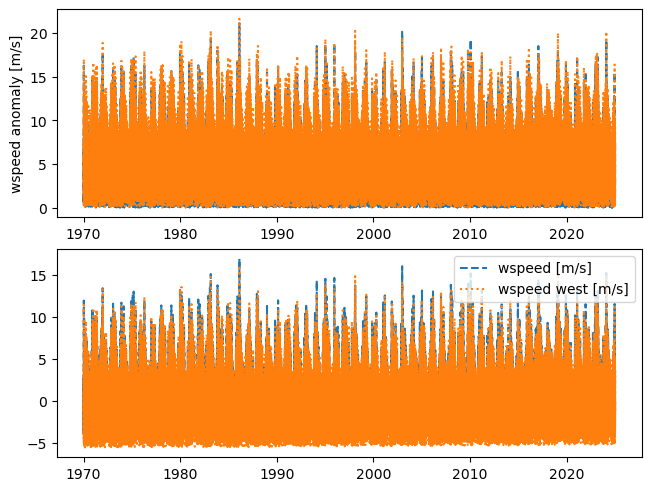

In [9]:
#I think maybe need to subtract the mean of the wspeed first, detrending doesn't do much
era5m['wspeed']=np.sqrt((era5m['u10']*era5m['u10'])+(era5m['v10']*era5m['v10']))
era5mw['wspeed']=np.sqrt((era5mw['u10']*era5mw['u10'])+(era5mw['v10']*era5mw['v10']))
era5m['wspeed_a']=detrend(era5m['wspeed'],type='linear')
era5mw['wspeed_a']=detrend(era5mw['wspeed'],type='linear')


fig, ax = plt.subplots(2, layout="constrained")
ax[0].plot(era5m.wspeed,label="wspeed [m/s]",linestyle='--')
ax[0].plot(era5mw.wspeed,label="wspeed west [m/s]",linestyle=':')

ax[1].plot(era5m.wspeed_a,label="wspeed [m/s]",linestyle='--')
ax[1].plot(era5mw.wspeed_a,label="wspeed west [m/s]",linestyle=':')

ax[0].set_ylabel('wspeed [m/s]')
ax[0].set_ylabel('wspeed anomaly [m/s]')
ax[1].legend()
plt.show()

In [10]:
era5mw['wspeed_a'].mean()

6.807157385562998e-16

In [11]:
#calculate windstress using Sam's method u_windstress = u * sqrt((u*u + v*v))
era5m['u10_str_a']=era5m['u10_a']*era5m['wspeed_a']
era5m['v10_str_a']=era5m['v10_a']*era5mw['wspeed_a']

era5mw['u10_str_a']=era5mw['u10_a']*era5m['wspeed_a']
era5mw['v10_str_a']=era5mw['v10_a']*era5mw['wspeed_a']

In [12]:
#compare with Sam's anomalies
mb_sam=pd.read_fwf("/global/scratch/users/jennaisrael/time_varying_data/slr_data_sam/data4regrbuild.daily.era5.monterey.norm0.txt")
mb_sam.columns=["Year", "Month", "Day", "ResWL_lo", "ResWL_hi", "SLPa", "TASa", "N34a", "PDOa", "U10a", "V10a"]
mb_sam["date"]=pd.to_datetime(mb_sam[['Year', 'Month', 'Day']])
mb_sam.index=mb_sam["date"]
mb_sam

,Year,Month,Day,ResWL_lo,ResWL_hi,SLPa,TASa,N34a,PDOa,U10a,V10a,date
date,,,,,,,,,,,,
1973-11-12,1973,11,12,-0.02788,0.05941,-2.01526,1.15286,-2.07505,-1.28235,0.58345,62.36506,1973-11-12
1973-11-13,1973,11,13,-0.02278,0.01739,0.51379,0.14197,-2.08711,-1.28528,-10.66715,35.28530,1973-11-13
1973-11-14,1973,11,14,-0.01262,-0.03827,2.04980,0.37289,-2.09914,-1.28824,-9.67575,30.52757,1973-11-14
1973-11-15,1973,11,15,-0.00850,-0.06106,2.26141,0.08441,-2.11116,-1.29122,-12.71806,30.81868,1973-11-15
1973-11-16,1973,11,16,-0.02547,0.00956,-3.54065,0.87811,-2.11025,-1.27463,-8.62905,67.52818,1973-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2020,12,27,-0.00009,0.01417,-1.68414,-1.22424,-1.32486,-0.91245,-1.72206,2.64090,2020-12-27
2020-12-28,2020,12,28,0.00145,0.13299,-12.65814,-1.16611,-1.32366,-0.91397,9.90384,20.82512,2020-12-28
2020-12-29,2020,12,29,0.00355,0.00568,0.04828,-0.54269,-1.32248,-0.91541,10.16266,-30.99345,2020-12-29


In [13]:
era5m.msl_a*0.001

valid_time
1970-01-01 00:00:00    0.669513
1970-01-01 01:00:00    0.698328
1970-01-01 02:00:00    0.665263
1970-01-01 03:00:00    0.678763
1970-01-01 04:00:00    0.661143
                         ...   
2025-01-01 19:00:00    0.612919
2025-01-01 20:00:00    0.554604
2025-01-01 21:00:00    0.500669
2025-01-01 22:00:00    0.462984
2025-01-01 23:00:00    0.432104
Name: msl_a, Length: 482160, dtype: float64

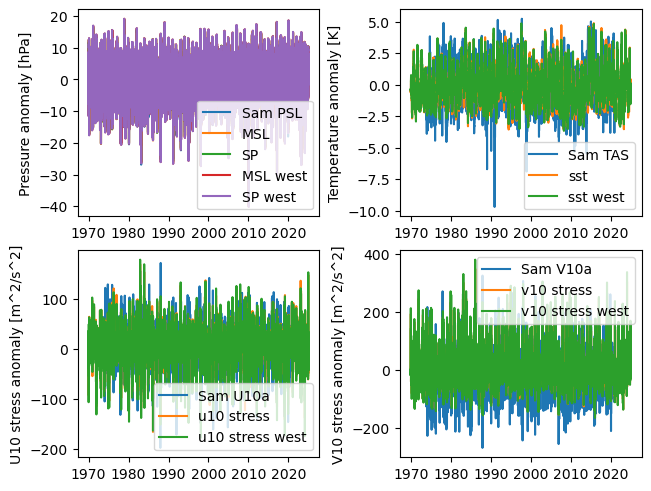

In [14]:
fig, ax = plt.subplots(2,2, layout="constrained")

ax[0,0].plot(mb_sam.SLPa,label='Sam PSL')
#convert to hPa (hecto pascals are sam's unit, the SI unit for pressure)
ax[0,0].plot(era5m.msl_a*0.01,label="MSL")
ax[0,0].plot(era5m.sp_a*0.01,label="SP")

ax[0,0].plot(era5mw.msl_a*0.01,label="MSL west")
ax[0,0].plot(era5mw.sp_a*0.01,label="SP west")
ax[0,0].set_ylabel('Pressure anomaly [hPa]')
ax[0,0].legend()

ax[0,1].plot(mb_sam.TASa,label='Sam TAS')
ax[0,1].plot(era5m.sst_a,label="sst")
ax[0,1].plot(era5mw.sst_a,label="sst west")
ax[0,1].set_ylabel('Temperature anomaly [K]')
ax[0,1].legend()

ax[1,0].plot(mb_sam.U10a,label='Sam U10a')
ax[1,0].plot(era5m.u10_str_a,label="u10 stress")
ax[1,0].plot(era5mw.u10_str_a,label="u10 stress west")
ax[1,0].set_ylabel('U10 stress anomaly [m^2/s^2]')
ax[1,0].legend()

ax[1,1].plot(mb_sam.V10a,label='Sam V10a')
ax[1,1].plot(era5m.v10_str_a,label="v10 stress")
ax[1,1].plot(era5mw.v10_str_a,label="v10 stress west")
ax[1,1].set_ylabel('V10 stress anomaly [m^2/s^2]')
ax[1,1].legend()

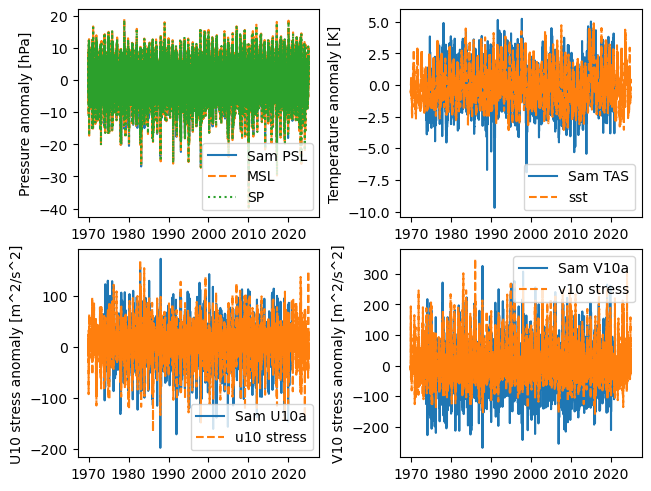

In [15]:
fig, ax = plt.subplots(2,2, layout="constrained")

ax[0,0].plot(mb_sam.SLPa,label='Sam PSL')
#convert to hPa (hecto pascals are sam's unit, the SI unit for pressure)
ax[0,0].plot(era5m.msl_a*0.01,label="MSL",linestyle='--')
ax[0,0].plot(era5m.sp_a*0.01,label="SP",linestyle=':')

# ax[0,0].plot(era5mw.msl_a*0.01,label="MSL west")
# ax[0,0].plot(era5mw.sp_a*0.01,label="SP west")
ax[0,0].set_ylabel('Pressure anomaly [hPa]')
ax[0,0].legend()

ax[0,1].plot(mb_sam.TASa,label='Sam TAS')
ax[0,1].plot(era5m.sst_a,label="sst",linestyle='--')
#ax[0,1].plot(era5mw.sst_a,label="sst west",linestyle=':')
ax[0,1].set_ylabel('Temperature anomaly [K]')
ax[0,1].legend()

ax[1,0].plot(mb_sam.U10a,label='Sam U10a')
ax[1,0].plot(era5m.u10_str_a,label="u10 stress",linestyle='--')
#ax[1,0].plot(era5mw.u10_str,label="u10 stress west",linestyle=':')
ax[1,0].set_ylabel('U10 stress anomaly [m^2/s^2]')
ax[1,0].legend()

ax[1,1].plot(mb_sam.V10a,label='Sam V10a')
ax[1,1].plot(era5m.v10_str_a,label="v10 stress",linestyle='--')
#ax[1,1].plot(era5mw.v10_str,label="v10 stress west",linestyle=':')
ax[1,1].set_ylabel('V10 stress anomaly [m^2/s^2]')
ax[1,1].legend()

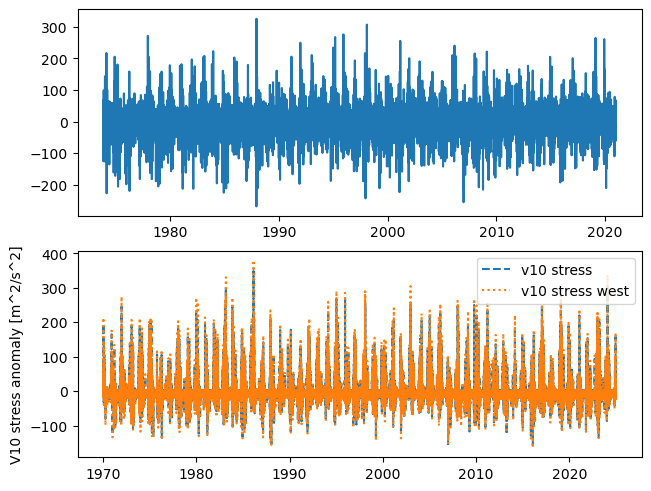

In [16]:
fig, ax = plt.subplots(2, layout="constrained")
ax[0].plot(mb_sam.V10a,label='Sam V10a')
ax[1].plot(era5m.v10_str_a,label="v10 stress",linestyle='--')
ax[1].plot(era5mw.v10_str_a,label="v10 stress west",linestyle=':')
ax[1].set_ylabel('V10 stress anomaly [m^2/s^2]')
ax[1].legend()
plt.show()

/tmp/ipykernel_4044392/2175799432.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].plot([era5m.valid_time[0],era5m.valid_time[-1]],[0,0],color='k')
/tmp/ipykernel_4044392/2175799432.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].plot([era5m.valid_time[0],era5m.valid_time[-1]],[0,0],color='k')


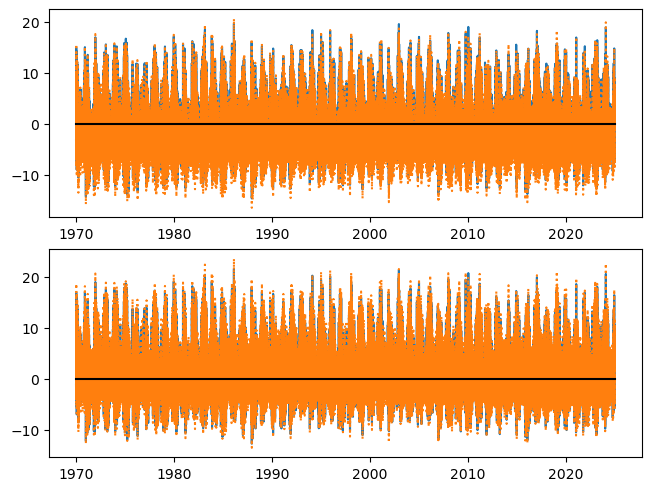

In [17]:
fig, ax = plt.subplots(2,layout="constrained")

ax[0].plot(era5m.v10, label='v10')
ax[1].plot(era5m.v10_a, label='detrended')
ax[0].plot(era5mw.v10, label='v10 west',linestyle=":")
ax[0].plot([era5m.valid_time[0],era5m.valid_time[-1]],[0,0],color='k')
ax[1].plot(era5mw.v10_a, label='west detrended',linestyle=":")
ax[1].plot([era5m.valid_time[0],era5m.valid_time[-1]],[0,0],color='k')

In [18]:
print(era5m.v10.mean())
print(era5mw.v10.mean())
print(era5m.v10_a.mean())
print(era5mw.v10_a.mean())

-1.8205735721160148
-2.863343956289376
2.7587025081775914e-17
-4.1970003970565066e-17


In [19]:
era5m.v10_a.mean()

2.7587025081775914e-17

In [20]:
#or maybe we should calculate windstress and then detrend (probably makes the most sense)
era5m['u10_stress'] = era5m['u10']*np.sqrt((era5m['u10']*era5m['u10'])+(era5m['v10']*era5m['v10']))
era5mw['u10_stress'] = era5mw['u10']*np.sqrt((era5mw['u10']*era5mw['u10'])+(era5mw['v10']*era5mw['v10']))

era5m['v10_stress'] = era5m['v10']*np.sqrt((era5m['u10']*era5m['u10'])+(era5m['v10']*era5m['v10']))
era5mw['v10_stress'] = era5mw['v10']*np.sqrt((era5mw['u10']*era5mw['u10'])+(era5mw['v10']*era5mw['v10']))

In [21]:
era5m['u10_stress_d2']=detrend(era5m['u10_stress'],type='linear')
era5m['v10_stress_d2']=detrend(era5m['v10_stress'],type='linear')

era5mw['u10_stress_d2']=detrend(era5mw['u10_stress'],type='linear')
era5mw['v10_stress_d2']=detrend(era5mw['v10_stress'],type='linear')

In [22]:
print(era5m['u10_stress_d2'].mean())
print(era5m['v10_stress_d2'].mean())

print(era5mw['u10_stress_d2'].mean())
print(era5mw['v10_stress_d2'].mean())

-4.923222937670779e-16
7.752661407596513e-16
-3.1802888401965262e-15
-3.829173395966161e-15


In [23]:
era5m['u10_stress_a2']=era5m['u10_stress_d2']-era5m['u10_stress_d2'].mean()
era5m['v10_stress_a2']=era5m['v10_stress_d2']-era5m['u10_stress_d2'].mean()

era5mw['u10_stress_a2']=era5mw['u10_stress_d2']-era5mw['u10_stress_d2'].mean()
era5mw['v10_stress_a2']=era5mw['v10_stress_d2']-era5mw['u10_stress_d2'].mean()

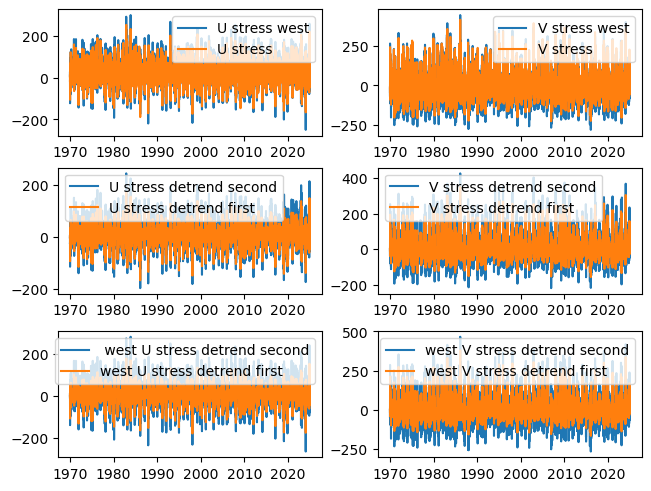

In [24]:
fig, ax = plt.subplots(3,2,layout='constrained')


ax[0,0].plot(era5mw['u10_stress'],label='U stress west')
ax[0,0].plot(era5m['u10_stress'],label='U stress')
ax[0,0].legend()


ax[0,1].plot(era5mw['v10_stress'],label='V stress west')
ax[0,1].plot(era5m['v10_stress'],label='V stress')
ax[0,1].legend()


ax[1,0].plot(era5m['u10_stress_a2'],label='U stress detrend second')
ax[1,0].plot(era5m['u10_str_a'],label='U stress detrend first')
ax[1,0].legend()


ax[1,1].plot(era5m['v10_stress_a2'],label='V stress detrend second')
ax[1,1].plot(era5m['v10_str_a'],label='V stress detrend first')
ax[1,1].legend()


ax[2,0].plot(era5mw['u10_stress_a2'],label=' west U stress detrend second')
ax[2,0].plot(era5mw['u10_str_a'],label='west U stress detrend first')
ax[2,0].legend()


ax[2,1].plot(era5mw['v10_stress_a2'],label='west V stress detrend second')
ax[2,1].plot(era5mw['v10_str_a'],label='west V stress detrend first')
ax[2,1].legend()

plt.show()

In [25]:
print(era5m['u10_stress'].mean())
print(era5mw['u10_stress'].mean())
print(era5m['v10_stress'].mean())
print(era5mw['v10_stress'].mean())
print(era5m['u10_stress_a2'].mean())
print(era5mw['u10_stress_a2'].mean())
print(era5m['v10_stress_a2'].mean())
print(era5mw['v10_stress_a2'].mean())

7.575086288168171
15.16727120788217
-8.37247860089424
-18.866449525505875
-1.2638158499001616e-16
-4.5271015518811756e-17
1.173273818862538e-15
-1.3015416961658381e-15


In [26]:
# #Detrending after calculating windstress matters, compare with Sam's data
# fig, ax = plt.subplots(2, layout="constrained")
# ax[0].plot(mb_sam.V10a,label='Sam V10a')
# ax[0].plot(era5m.v10_stress_a2,label="v10 stress",linestyle='--')

# ax[1].plot(mb_sam.V10a,label='Sam V10a')
# ax[1].plot(era5mw.v10_stress_a2,label="v10 stress west",linestyle='--')

# ax[1].set_ylabel('V10 stress anomaly [m^2/s^2]')
# ax[1].legend()
# plt.show()

In [27]:
# #reorder the plotting from above
# fig, ax = plt.subplots(2, layout="constrained")

# ax[0].plot(era5m.v10_stress_a2,label="v10 stress")
# ax[0].plot(mb_sam.V10a,label='Sam V10a',linestyle='--')


# ax[1].plot(era5mw.v10_stress_a2,label="v10 stress west",linestyle='--')
# ax[1].plot(mb_sam.V10a,label='Sam V10a',linestyle='--')

# ax[1].set_ylabel('V10 stress anomaly [m^2/s^2]')
# ax[1].legend()
# plt.show()

My era5 wind stress anomaly data has high peaks than sam's even though I though he was using a location further offshore

Look at the comparison again for a short window of time to better see differences

In [28]:
# fig, ax = plt.subplots(2,2, layout="constrained")


# #convert to hPa (hecto pascals are sam's unit, the SI unit for pressure)
# ax[0,0].plot(era5m.msl_a*0.01,label="MSL",linestyle='-')
# ax[0,0].plot(era5m.sp_a*0.01,label="SP",linestyle='--')
# ax[0,0].plot(mb_sam.SLPa,label='Sam PSL',linestyle=':')

# # ax[0,0].plot(era5mw.msl_a*0.01,label="MSL west")
# # ax[0,0].plot(era5mw.sp_a*0.01,label="SP west")
# ax[0,0].set_ylabel('Pressure anomaly [hPa]')
# ax[0,0].legend()


# ax[0,1].plot(era5m.sst_a,label="sst",linestyle='--')
# ax[0,1].plot(mb_sam.TASa,label='Sam TAS',linestyle=':')
# #ax[0,1].plot(era5mw.sst_a,label="sst west",linestyle=':')
# ax[0,1].set_ylabel('Temperature anomaly [K]')
# ax[0,1].legend()


# ax[1,0].plot(era5m.u10_stress_a2,label="u10 stress",linestyle='--')
# ax[1,0].plot(mb_sam.U10a,label='Sam U10a',linestyle=':')
# #ax[1,0].plot(era5mw.u10_str,label="u10 stress west",linestyle=':')
# ax[1,0].set_ylabel('U10 stress anomaly [m^2/s^2]')
# ax[1,0].legend()


# ax[1,1].plot(era5m.v10_stress_a2,label="v10 stress",linestyle='--')
# ax[1,1].plot(mb_sam.V10a,label='Sam V10a',linestyle=':')
# #ax[1,1].plot(era5mw.v10_str,label="v10 stress west",linestyle=':')
# ax[1,1].set_ylabel('V10 stress anomaly [m^2/s^2]')
# ax[1,1].legend()

In [29]:
# fig, ax = plt.subplots(2,2, layout="constrained",sharex=True)


# #convert to hPa (hecto pascals are sam's unit, the SI unit for pressure)
# ax[0,0].plot(era5m.msl_a*0.01,label="MSL",linestyle='-')
# ax[0,0].plot(era5m.sp_a*0.01,label="SP",linestyle='--')
# ax[0,0].plot(mb_sam.SLPa,label='Sam PSL',linestyle=':')

# # ax[0,0].plot(era5mw.msl_a*0.01,label="MSL west")
# # ax[0,0].plot(era5mw.sp_a*0.01,label="SP west")
# ax[0,0].set_ylabel('Pressure anomaly [hPa]')
# ax[0,0].legend()


# ax[0,1].plot(era5m.sst_a,label="sst",linestyle='--')
# ax[0,1].plot(mb_sam.TASa,label='Sam TAS',linestyle=':')
# #ax[0,1].plot(era5mw.sst_a,label="sst west",linestyle=':')
# ax[0,1].set_ylabel('Temperature anomaly [K]')
# ax[0,1].legend()


# ax[1,0].plot(era5m.u10_stress_a2,label="u10 stress",linestyle='--')
# ax[1,0].plot(mb_sam.U10a,label='Sam U10a',linestyle=':')
# #ax[1,0].plot(era5mw.u10_str,label="u10 stress west",linestyle=':')
# ax[1,0].set_ylabel('U10 stress anomaly [m^2/s^2]')
# ax[1,0].legend()


# ax[1,1].plot(era5m.v10_stress_a2,label="v10 stress",linestyle='--')
# ax[1,1].plot(mb_sam.V10a,label='Sam V10a',linestyle=':')
# #ax[1,1].plot(era5mw.v10_str,label="v10 stress west",linestyle=':')
# ax[1,1].set_ylabel('V10 stress anomaly [m^2/s^2]')
# ax[1,1].legend()

# ax[0,0].set_xlim([datetime(2014,11,1), datetime(2015,1,7)])

In [30]:
#export the anomalies as csv

data2save_raw=era5m[['u10_stress_a2','v10_stress_a2','msl_a','sst_a']]
#rename the a2 to just a
data2save=data2save_raw.rename(columns={'u10_stress_a2':'u10_stress_a','v10_stress_a2':'v10_stress_a'})
data2save

,u10_stress_a,v10_stress_a,msl_a,sst_a
valid_time,,,,
1970-01-01 00:00:00,-3.070642,-1.170650,669.512711,-0.521550
1970-01-01 01:00:00,-2.848234,-3.210390,698.327676,-0.521550
1970-01-01 02:00:00,-3.586008,-1.297828,665.262641,-0.521550
1970-01-01 03:00:00,-4.279772,-1.620550,678.762606,-0.521551
1970-01-01 04:00:00,-6.040990,-3.819356,661.142571,-0.521551
...,...,...,...,...
2025-01-01 19:00:00,-8.844623,-0.405153,612.918883,-0.373825
2025-01-01 20:00:00,-3.020198,-11.571639,554.603848,-0.373825
2025-01-01 21:00:00,0.439085,-20.861576,500.668813,-0.373825


In [31]:
writepath="/global/scratch/users/jennaisrael/time_varying_data/era5/monterey/"
data2save.to_csv(writepath+'/'+"monterey_anomalies_36.5_122.0.csv")

# Repeat check for Point Reyes

In [3]:
era5pw=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/era5/point_reyes/era5_38.0_123.25_wind.csv",parse_dates=["valid_time"])
era5ps=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/era5/point_reyes/era5_37.75_123.0_wind.csv",parse_dates=["valid_time"])
era5pw.index=era5pw.valid_time
era5ps.index=era5ps.valid_time
era5pw

,valid_time,u10,v10,d2m,t2m,msl,sst,sp,tp,latitude,longitude
valid_time,,,,,,,,,,,
1970-01-01 00:00:00,1970-01-01 00:00:00,2.415802,-2.479034,280.57250,283.45087,102484.310,285.86523,102355.340,0.000000,38.0,-123.25
1970-01-01 01:00:00,1970-01-01 01:00:00,3.078964,-2.912445,280.71070,283.54236,102497.125,285.86523,102367.234,0.000000,38.0,-123.25
1970-01-01 02:00:00,1970-01-01 02:00:00,3.283264,-3.269897,281.01184,283.68365,102464.810,285.86523,102335.445,0.000000,38.0,-123.25
1970-01-01 03:00:00,1970-01-01 03:00:00,3.226456,-4.007050,281.44790,283.83572,102482.560,285.86523,102352.720,0.000000,38.0,-123.25
1970-01-01 04:00:00,1970-01-01 04:00:00,3.271027,-4.250854,281.66200,283.93810,102468.940,285.86523,102340.000,0.000000,38.0,-123.25
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-01 19:00:00,2025-01-01 19:00:00,-1.877457,1.890137,281.97113,284.61346,102391.875,285.03076,102262.420,0.000000,38.0,-123.25
2025-01-01 20:00:00,2025-01-01 20:00:00,-0.862976,2.232742,282.26556,284.67627,102377.060,285.03076,102248.164,0.000000,38.0,-123.25
2025-01-01 21:00:00,2025-01-01 21:00:00,-0.609818,1.934799,282.55316,284.65198,102294.125,285.03076,102165.260,0.001274,38.0,-123.25


In [4]:
#detrend u10, v10, msl, sst, sp
era5pw['u10_d']=detrend(era5pw['u10'],type='linear')
era5pw['v10_d']=detrend(era5pw['v10'],type='linear')
era5pw['msl_d']=detrend(era5pw['msl'],type='linear')
era5pw['sst_d']=detrend(era5pw['sst'],type='linear')
era5pw['sp_d']=detrend(era5pw['sp'],type='linear')

era5ps['u10_d']=detrend(era5ps['u10'],type='linear')
era5ps['v10_d']=detrend(era5ps['v10'],type='linear')
era5ps['msl_d']=detrend(era5ps['msl'],type='linear')
era5ps['sst_d']=detrend(era5ps['sst'],type='linear')
era5ps['sp_d']=detrend(era5ps['sp'],type='linear')

In [5]:
print(era5pw['u10'].mean())
print(era5pw['v10'].mean())
print(era5pw['msl'].mean())
print(era5pw['sst'].mean())
print(era5pw['sp'].mean())

print(era5ps['u10'].mean())
print(era5ps['v10'].mean())
print(era5ps['msl'].mean())
print(era5ps['sst'].mean())
print(era5ps['sp'].mean())

3.5303565515760282
-2.917561902884911
101652.856107091
285.1819860097063
101526.22884452052
3.5910496899693456
-2.678680324008116
101655.73544042434
285.648001718558
101703.3188167289


In [33]:
#the 2 stations have very similar mean values

In [6]:
print(era5pw['u10_d'].mean())
print(era5pw['v10_d'].mean())
print(era5pw['msl_d'].mean())
print(era5pw['sst_d'].mean())
print(era5pw['sp_d'].mean())

print(era5ps['u10_d'].mean())
print(era5ps['v10_d'].mean())
print(era5ps['msl_d'].mean())
print(era5ps['sst_d'].mean())
print(era5ps['sp_d'].mean())

-1.150638311103132e-16
-6.6020230964933815e-18
-3.692798988817293e-11
-1.0854480487560433e-13
-1.5293031933086813e-11
-1.409060358023016e-15
4.866634168272264e-16
-3.063000693190389e-11
-6.387928918935668e-14
-2.7831171668468867e-11


In [7]:
#Subtract the mean
era5pw['u10_a']=era5pw['u10_d']-era5pw['u10_d'].mean()
era5pw['v10_a']=era5pw['v10_d']-era5pw['v10_d'].mean()
era5pw['msl_a']=era5pw['msl_d']-era5pw['msl_d'].mean()
era5pw['sst_a']=era5pw['sst_d']-era5pw['sst_d'].mean()
era5pw['sp_a']=era5pw['sp_d']-era5pw['sp_d'].mean()

era5ps['u10_a']=era5ps['u10_d']-era5ps['u10_d'].mean()
era5ps['v10_a']=era5ps['v10_d']-era5ps['v10_d'].mean()
era5ps['msl_a']=era5ps['msl_d']-era5ps['msl_d'].mean()
era5ps['sst_a']=era5ps['sst_d']-era5ps['sst_d'].mean()
era5ps['sp_a']=era5ps['sp_d']-era5ps['sp_d'].mean()

In [ ]:
# fig, ax = plt.subplots(5,2,figsize=(10,8),layout="constrained")

# ax[0,0].plot(era5pw.u10, label='u10 west')
# ax[0,1].plot(era5pw.u10_a, label='detrended west')
# ax[0,0].plot(era5ps.u10, label='u10 south',linestyle=":")
# ax[0,1].plot(era5ps.u10_a, label='detrended south',linestyle=":")

# ax[0,0].set_ylabel('u10 [m/s]')

# ax[1,0].plot(era5pw.v10, label='v10 west')
# ax[1,1].plot(era5pw.v10_a, label='detrended west')
# ax[1,0].plot(era5ps.v10, label='v10 south',linestyle=":")
# ax[1,1].plot(era5ps.v10_a, label='detrended south',linestyle=":")

# ax[1,0].set_ylabel('v10 [m/s]')

# ax[2,0].plot(era5pw.msl, label='psl west')
# ax[2,1].plot(era5pw.msl_a, label='detrended west')
# ax[2,0].plot(era5ps.msl, label='psl south',linestyle=":")
# ax[2,1].plot(era5ps.msl_a, label='detrended south',linestyle=":")

# ax[2,0].set_ylabel('psl [Pa]')

# ax[3,0].plot(era5pw.sst, label='sst west')
# ax[3,1].plot(era5pw.sst_a, label='detrended west')
# ax[3,0].plot(era5ps.sst, label='sst south',linestyle=":")
# ax[3,1].plot(era5ps.sst_a, label='detrended south',linestyle=":")

# ax[3,0].set_ylabel('sst [K]')

# ax[4,0].plot(era5pw.sp, label='sp west')
# ax[4,1].plot(era5pw.sp_a, label='detrended west')
# ax[4,0].plot(era5ps.sp, label='sp south')
# ax[4,1].plot(era5ps.sp_a, label='detrended south')

# ax[4,0].set_ylabel('sp [Pa]')

# ax[0,1].legend()
# # ax[1].legend()
# # ax[2].legend()
# # ax[3].legend()
# # ax[4].legend()

In [ ]:
# fig, ax = plt.subplots(5,2,figsize=(10,8),layout="constrained",sharex=True)

# ax[0,0].plot(era5pw.u10, label='u10 west')
# ax[0,1].plot(era5pw.u10_a, label='detrended west')
# ax[0,0].plot(era5ps.u10, label='u10 south',linestyle=":")
# ax[0,1].plot(era5ps.u10_a, label='detrended south',linestyle=":")

# ax[0,0].set_ylabel('u10 [m/s]')

# ax[1,0].plot(era5pw.v10, label='v10 west')
# ax[1,1].plot(era5pw.v10_a, label='detrended west')
# ax[1,0].plot(era5ps.v10, label='v10 south',linestyle=":")
# ax[1,1].plot(era5ps.v10_a, label='detrended south',linestyle=":")

# ax[1,0].set_ylabel('v10 [m/s]')

# ax[2,0].plot(era5pw.msl, label='psl west')
# ax[2,1].plot(era5pw.msl_a, label='detrended west')
# ax[2,0].plot(era5ps.msl, label='psl south',linestyle=":")
# ax[2,1].plot(era5ps.msl_a, label='detrended south',linestyle=":")

# ax[2,0].set_ylabel('psl [Pa]')

# ax[3,0].plot(era5pw.sst, label='sst west')
# ax[3,1].plot(era5pw.sst_a, label='detrended west')
# ax[3,0].plot(era5ps.sst, label='sst south',linestyle=":")
# ax[3,1].plot(era5ps.sst_a, label='detrended south',linestyle=":")

# ax[3,0].set_ylabel('sst [K]')

# ax[4,0].plot(era5pw.sp, label='sp west')
# ax[4,1].plot(era5pw.sp_a, label='detrended west')
# ax[4,0].plot(era5ps.sp, label='sp south')
# ax[4,1].plot(era5ps.sp_a, label='detrended south')

# ax[4,0].set_ylabel('sp [Pa]')



# ax[0,1].legend()
# ax[0,0].set_xlim([datetime(2014,11,1), datetime(2015,1,7)])
# # ax[1].legend()
# # ax[2].legend()
# # ax[3].legend()
# # ax[4].legend()

Calculate windstress

In [8]:
era5pw['u10_stress'] = era5pw['u10']*np.sqrt((era5pw['u10']*era5pw['u10'])+(era5pw['v10']*era5pw['v10']))
era5ps['u10_stress'] = era5ps['u10']*np.sqrt((era5ps['u10']*era5ps['u10'])+(era5ps['v10']*era5ps['v10']))

era5pw['v10_stress'] = era5pw['v10']*np.sqrt((era5pw['u10']*era5pw['u10'])+(era5pw['v10']*era5pw['v10']))
era5ps['v10_stress'] = era5ps['v10']*np.sqrt((era5ps['u10']*era5ps['u10'])+(era5ps['v10']*era5ps['v10']))

In [9]:
era5pw['u10_stress_d2']=detrend(era5pw['u10_stress'],type='linear')
era5pw['v10_stress_d2']=detrend(era5pw['v10_stress'],type='linear')

era5ps['u10_stress_d2']=detrend(era5ps['u10_stress'],type='linear')
era5ps['v10_stress_d2']=detrend(era5ps['v10_stress'],type='linear')

In [11]:
print(era5pw['u10_stress'].mean())
print(era5ps['u10_stress'].mean())
print(era5pw['v10_stress'].mean())
print(era5ps['v10_stress'].mean())
print(era5pw['u10_stress_d2'].mean())
print(era5ps['u10_stress_d2'].mean())
print(era5pw['v10_stress_d2'].mean())
print(era5ps['v10_stress_d2'].mean())

30.976772307297875
31.725919929605926
-27.686874991202536
-25.02318550751429
1.596557813963428e-14
-9.748358675050799e-15
3.7122232725425646e-15
4.0593010581867875e-15


In [12]:
era5pw['u10_stress_a']=era5pw['u10_stress_d2']-era5pw['u10_stress_d2'].mean()
era5pw['v10_stress_a']=era5pw['v10_stress_d2']-era5pw['v10_stress_d2'].mean()

era5ps['u10_stress_a']=era5ps['u10_stress_d2']-era5ps['u10_stress_d2'].mean()
era5ps['v10_stress_a']=era5ps['v10_stress_d2']-era5ps['v10_stress_d2'].mean()

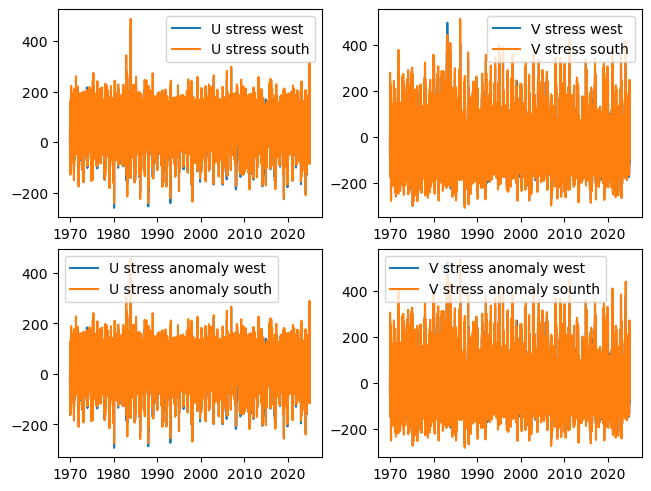

In [13]:
fig, ax = plt.subplots(2,2,layout='constrained')

ax[0,0].plot(era5pw['u10_stress'],label='U stress west')
ax[0,0].plot(era5ps['u10_stress'],label='U stress south')
ax[0,0].legend()


ax[0,1].plot(era5pw['v10_stress'],label='V stress west')
ax[0,1].plot(era5ps['v10_stress'],label='V stress south')
ax[0,1].legend()


ax[1,0].plot(era5pw['u10_stress_a'],label='U stress anomaly west')
ax[1,0].plot(era5ps['u10_stress_a'],label='U stress anomaly south')
ax[1,0].legend()


ax[1,1].plot(era5pw['v10_stress_a'],label='V stress anomaly west')
ax[1,1].plot(era5ps['v10_stress_a'],label='V stress anomaly south')
ax[1,1].legend()

plt.show()

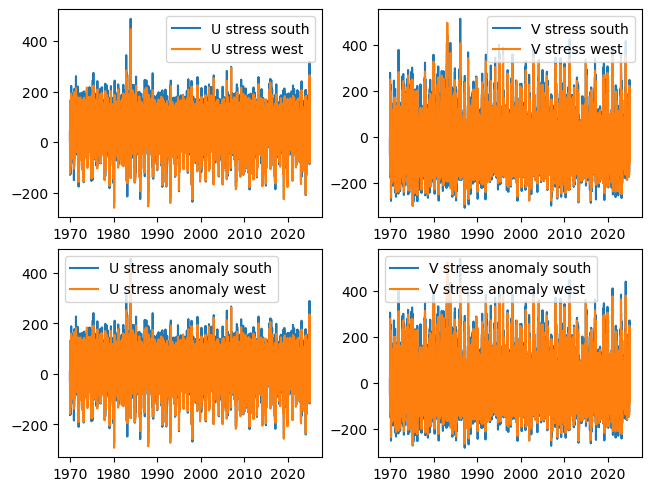

In [14]:
fig, ax = plt.subplots(2,2,layout='constrained')


ax[0,0].plot(era5ps['u10_stress'],label='U stress south')
ax[0,0].plot(era5pw['u10_stress'],label='U stress west')
ax[0,0].legend()


ax[0,1].plot(era5ps['v10_stress'],label='V stress south')
ax[0,1].plot(era5pw['v10_stress'],label='V stress west')
ax[0,1].legend()


ax[1,0].plot(era5ps['u10_stress_a'],label='U stress anomaly south')
ax[1,0].plot(era5pw['u10_stress_a'],label='U stress anomaly west')
ax[1,0].legend()


ax[1,1].plot(era5ps['v10_stress_a'],label='V stress anomaly south')
ax[1,1].plot(era5pw['v10_stress_a'],label='V stress anomaly west')
ax[1,1].legend()

plt.show()

In [16]:
#export the anomalies as csv

data2save=era5pw[['u10_stress_a','v10_stress_a','msl_a','sst_a']]
data2save

,u10_stress_a,v10_stress_a,msl_a,sst_a
valid_time,,,,
1970-01-01 00:00:00,-24.394071,20.580676,838.929361,0.814710
1970-01-01 01:00:00,-19.706996,16.818220,851.744330,0.814709
1970-01-01 02:00:00,-17.542288,14.009711,819.429299,0.814708
1970-01-01 03:00:00,-16.157569,8.547245,837.179268,0.814708
1970-01-01 04:00:00,-15.211410,6.361384,823.559237,0.814707
...,...,...,...,...
2025-01-01 19:00:00,-34.199042,31.247542,731.543548,-0.282689
2025-01-01 20:00:00,-31.263009,31.556558,716.728517,-0.282690
2025-01-01 21:00:00,-30.434376,30.136991,633.793486,-0.282690


In [17]:
writepath="/global/scratch/users/jennaisrael/time_varying_data/era5/point_reyes/"
data2save.to_csv(writepath+'/'+"point_reyes_anomalies_38.0_123.25.csv")